# Project: Wrangling and Analyze Data

In [1]:
#Import all libraries
import pandas as pd
import numpy as np

#Import module to download file from Udacity's host
import requests
import os

#Import libraries to read json type
import json

#Import libraries to draw plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read the "twitter_archive_enhanced.csv" into dataframe

twit_df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#url address of the image_prediction.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#create a folder to store the image prediction dataset
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#create the request to the url
response = requests.get(url)

#access the contect and write into the file to the folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
#read the tsv file into dataframe
img_df = pd.read_csv('image_prediction/image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twit_df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
#import the json txt file into dataframe

#Read each line in the json txt file
with open('tweet-json.txt') as file:
    lines = file.readlines()
    
#transform the json line into dataframe
data = []
for line in lines:
    data.append(json.loads(line))

api_df = pd.DataFrame(data, columns = ['id','favorite_count','retweet_count'])
api_df = api_df.rename(columns = {'id':'tweet_id'})

## Assessing Data


__*1. twitter_archive_enhanced dataset*__

In [7]:
twit_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twit_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#check the unique value of each column
twit_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
#Check the value of "name" column
twit_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [12]:
twit_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twit_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#show full content of the queried column
pd.set_option('display.max_colwidth', -1)

#test the outlier value in rating_numerator column
twit_df[twit_df['rating_numerator'] > 30][['text','rating_numerator','in_reply_to_status_id','retweeted_status_id']]

,text,rating_numerator,in_reply_to_status_id,retweeted_status_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,8.558616e+17,NaN
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,8.558585e+17,NaN
290,@markhoppus 182/10,182,8.381455e+17,NaN
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,8.352460e+17,NaN
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,NaN,7.867091e+17
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,NaN,NaN
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,NaN,NaN
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,NaN,NaN
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,NaN,NaN
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,NaN,NaN


In [15]:
#Find the reasons for why the rating_denomination values are not equal to 10
false_rating = twit_df.query('rating_denominator != 10')
false_rating.loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [16]:
twit_df.text.sample(5)

924     This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k                     
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C                
174     This is Wyatt. He had an interview earlier today. Was just told he didn't get the job. A h*ckin injustice. Still 12/10 keep your chin pup https://t.co/QXA4sCXSDF
1502    This is Teddy. His head is too heavy. 13/10 (vid by @jooanrim) https://t.co/sRUpRpGZ3y                                                                           
317     This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love https://t.co/3FIqvumEXE
Name: text, dtype: object

In [17]:
# assess the "source" column
twit_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [18]:
# test the duplication of the key value
twit_df['tweet_id'].duplicated().sum()

0

__*2. image_prediction dataset*__

In [19]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
img_df.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [23]:
# Check the format of p1, p2 and p3 columns
img_df.loc[:,['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [24]:
# test the duplication of the key value
img_df['tweet_id'].duplicated().sum()

0

__*3. tweet-json.txt*__

In [25]:
api_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [26]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [28]:
api_df.nunique()

tweet_id          2354
favorite_count    2007
retweet_count     1724
dtype: int64

In [29]:
#test the duplication of the key value
api_df['tweet_id'].duplicated().sum()

0

### Quality issues

1. tweet_id should be in string type, note int64 

2. "timestamp" column is string type, not timestamps type

3. There are some values which could be considered as not appropriate in the "name" column: 'a', 'quite', 'not', 'one', 'an', 'mad', 'very,' just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'the', 'by', 'life', 'light', 'space'

4. Rating_numerator should be converted into float64, instead of int64 due to there are decimal number in the text and the current data type could not capture it.

5. We only consider the original tweet and eliminate all rows which are retweet and reply

6. We would choose rows that have images identified by joining with image-predictions dataframe

7. There are not appropriate values in the rating_denomination which should always equal to 10. The rating_numerator also encouter the same issue, however, we believe after the fix of the rating_denomination column, the data issue of rating_numerator column would be eliminated accordingly.

8. There are 5 columns having majorly "NaN" value in twitter_archive_enhanced dataset. As such, they could be dropped off due to their current position in the analysis.

### Tidiness issues
1. The columns contain the information of the stages of dog life (i.e. doggo, floofer, pupper, puppo) in the twitter_archive_enhanced dataset should not be seperated into three columns as it shows many "None" values in these 3 columns. Accordingly, these columns should be combined into only one column.

2. The "source" column should be seperated into two columns: "url" and "device", because one column source is containing two information for two independent variables.

## Cleaning Data


In [30]:
# Make copies of original pieces of data
twit_df_clean = twit_df.copy()
img_df_clean = img_df.copy()
api_df_clean = api_df.copy()

### Issue #1:

#### Define:
Change the data type of "tweet_id" from int64 to string

#### Code

In [31]:
# Change the datatype from int64 to str
twit_df_clean['tweet_id'] = twit_df_clean['tweet_id'].astype(str)
img_df_clean['tweet_id'] = img_df_clean['tweet_id'].astype(str)
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype(str)

#### Test

In [32]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [33]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [34]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #2:

#### Define

"timestamp" column is string type, not timestamps type. Therefore, they would be converted into timestamps datatype

#### Code

In [35]:
twit_df_clean['timestamp'] = pd.to_datetime(twit_df_clean['timestamp'],format = '%Y-%m-%d')

#### Test

In [36]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3:

#### Define

There are some values which could be considered as not appropriate in the "name" column. These value would be set as None for further investigation

#### Code

In [37]:
#list all the incorrect name which are all lowercase
twit_df_clean[twit_df_clean['name'].str.contains("^([a-z])+?", regex = True)].name.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


a               55
the             8 
an              7 
very            5 
quite           4 
just            4 
one             4 
getting         2 
not             2 
mad             2 
actually        2 
space           1 
life            1 
light           1 
by              1 
his             1 
unacceptable    1 
incredibly      1 
officially      1 
infuriating     1 
this            1 
my              1 
old             1 
all             1 
such            1 
Name: name, dtype: int64

In [38]:
# Filter out the rows where the name of dog falls inside the list of incorrect name
twit_df_clean = twit_df_clean[~twit_df_clean['name'].str.contains("^([a-z])+?", regex = True)]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


#### Test

In [39]:
twit_df_clean[twit_df_clean['name'].str.contains("^([a-z])+?", regex = True)].name.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


Series([], Name: name, dtype: int64)

### Issue #4:

#### Define

Rating_numerator should be converted into float64, instead of int64 due to there are decimal number in the text and the current data type could not capture it

#### Code

In [40]:
# extract the rating numerator from the text and save it as float type
twit_df_clean['rating_numerator'] = twit_df_clean.text.str.extract(r'((?:\d+\.)?\d+)\/(\d+)', expand = True)\
                                    .astype('float')

In [41]:
# check the number of rows and data type of rating_numerator column
print(twit_df_clean.info())

# check the values of the rating numerator columns
twit_df_clean['rating_numerator'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2247 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2247 non-null datetime64[ns]
source                        2247 non-null object
text                          2247 non-null object
retweeted_status_id           176 non-null float64
retweeted_status_user_id      176 non-null float64
retweeted_status_timestamp    176 non-null object
expanded_urls                 2188 non-null object
rating_numerator              2247 non-null float64
rating_denominator            2247 non-null int64
name                          2247 non-null object
doggo                         2247 non-null object
floofer                       2247 non-null object
pupper                        2247 non-null object
puppo                         2247 non-null object
dtypes: datetime64[ns

12.00      541
11.00      447
10.00      437
13.00      343
9.00       144
8.00       95 
14.00      50 
7.00       49 
5.00       34 
6.00       30 
3.00       18 
4.00       14 
1.00       8  
2.00       7  
9.75       2  
15.00      2  
420.00     2  
0.00       2  
88.00      1  
666.00     1  
182.00     1  
165.00     1  
13.50      1  
17.00      1  
45.00      1  
1776.00    1  
960.00     1  
99.00      1  
84.00      1  
144.00     1  
24.00      1  
11.27      1  
11.26      1  
121.00     1  
50.00      1  
80.00      1  
44.00      1  
20.00      1  
9.50       1  
143.00     1  
Name: rating_numerator, dtype: int64

#### Test

In [42]:
# check whether the data type is changed 
print(twit_df_clean.info())

# check if the change effects the data of the column
print(twit_df_clean['rating_numerator'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2247 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2247 non-null datetime64[ns]
source                        2247 non-null object
text                          2247 non-null object
retweeted_status_id           176 non-null float64
retweeted_status_user_id      176 non-null float64
retweeted_status_timestamp    176 non-null object
expanded_urls                 2188 non-null object
rating_numerator              2247 non-null float64
rating_denominator            2247 non-null int64
name                          2247 non-null object
doggo                         2247 non-null object
floofer                       2247 non-null object
pupper                        2247 non-null object
puppo                         2247 non-null object
dtypes: datetime64[ns

### Issue #5:

#### Define

The analysis should only contains original tweets by eliminate any rows having value in column "in_reply_to_status_id" and "retweeted_status_id"

#### Code

In [43]:
#Drop rows where the column "in_reply_to_status_id" has value
twit_df_clean = twit_df_clean.drop(twit_df_clean[~twit_df_clean["in_reply_to_status_id"].isnull()].index, axis = 0)

#Drop rows where the column "retweeted_status_id" has value
twit_df_clean = twit_df_clean.drop(twit_df_clean[~twit_df_clean["retweeted_status_id"].isnull()].index, axis = 0)

#### Test

In [44]:
# Check if there is still any value in "in_reply_to_status_id" and "retweeted_status_id"
print(twit_df_clean['in_reply_to_status_id'].value_counts())
print(twit_df_clean['retweeted_status_id'].value_counts())


Series([], Name: in_reply_to_status_id, dtype: int64)
Series([], Name: retweeted_status_id, dtype: int64)


### Issue #6:

#### Define

Only rows having corresponding image in image-prediction dataframe would be chosen for further analysis

#### Code

In [45]:
#create a clone dataframe img_test of img_df_clean to  having only two columns: tweet_id and jpg_url
img_test = img_df_clean[['tweet_id','jpg_url']]

#join the twit_df_clean with img_test to enrich the column jpg_url into the twit_df_clean
twit_df_clean = twit_df_clean.merge(img_test, on = 'tweet_id', how = 'left')

# drop rows where the "jpg_url" enriched has null value
twit_df_clean = twit_df_clean.drop(twit_df_clean[twit_df_clean['jpg_url'].isnull()].index, axis = 0)


#### Test

In [46]:
#number of null value in jpg_url column
print(twit_df_clean[twit_df_clean["jpg_url"].isnull()].jpg_url.value_counts())

# Drop the column 'jpg_url'
twit_df_clean = twit_df_clean.drop(['jpg_url'], axis = 1)

Series([], Name: jpg_url, dtype: int64)


### Issue #7:

#### Define

Remove all rows which have the value more than 10 or equal 7 in the rating_denominator column

#### Code

In [47]:
#drop the rows of rating_denominator under the conditions above
twit_df_clean = twit_df_clean.drop(twit_df_clean.query('(rating_denominator > 10) | (rating_denominator == 7)').index, axis = 0)

#### Test

In [48]:
#identify whether there are any value other than 10 in rating_denominator column
twit_df_clean.rating_denominator.value_counts()

10    1859
Name: rating_denominator, dtype: int64

### Issue #8:

#### Define

There are 5 columns having majorly "NaN" value in twitter_archive_enhanced dataset. As such, they could be dropped off due to their current position in the analysis.

#### Code

In [49]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 1992
Data columns (total 17 columns):
tweet_id                      1859 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1859 non-null datetime64[ns]
source                        1859 non-null object
text                          1859 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1859 non-null object
rating_numerator              1859 non-null float64
rating_denominator            1859 non-null int64
name                          1859 non-null object
doggo                         1859 non-null object
floofer                       1859 non-null object
pupper                        1859 non-null object
puppo                         1859 non-null object
dtypes: datetime64[ns](1), fl

In [50]:
# drop the list of column aforementioned
twit_df_clean = twit_df_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id', \
                                              'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test

In [51]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 1992
Data columns (total 12 columns):
tweet_id              1859 non-null object
timestamp             1859 non-null datetime64[ns]
source                1859 non-null object
text                  1859 non-null object
expanded_urls         1859 non-null object
rating_numerator      1859 non-null float64
rating_denominator    1859 non-null int64
name                  1859 non-null object
doggo                 1859 non-null object
floofer               1859 non-null object
pupper                1859 non-null object
puppo                 1859 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 188.8+ KB


### Tidiness issues #1

#### Define

The columns contain the information of the stages of dog life (i.e. doggo, floofer, pupper, puppo) in the twitter_archive_enhanced dataset should not be seperated into three columns as it shows many "None" values in these 3 columns. Accordingly, these columns would be combined into only one column.



#### Code

In [52]:
#replace 'None' with empty string
twit_df_clean.replace({'None':""}, inplace = True)

#join 4 columns into 1 column named "dog_stage"
twit_df_clean['dog_stage'] = twit_df_clean['doggo'] + twit_df_clean['floofer'] + twit_df_clean['pupper'] + \
                                twit_df_clean['puppo']


#remove the four columns about the dog stage in the dataframe
twit_df_clean = twit_df_clean.drop(columns = ['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [53]:
print(twit_df_clean.info())

twit_df_clean.dog_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 1992
Data columns (total 9 columns):
tweet_id              1859 non-null object
timestamp             1859 non-null datetime64[ns]
source                1859 non-null object
text                  1859 non-null object
expanded_urls         1859 non-null object
rating_numerator      1859 non-null float64
rating_denominator    1859 non-null int64
name                  1859 non-null object
dog_stage             1859 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 145.2+ KB
None


                1568
pupper          192 
doggo           61  
puppo           22  
doggopupper     7   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

#### Define#2

According to the test above, it could be seen that there are rows containing two dog stages for one dog and this could be concluded as inappropriate. The solution here would be to eliminate these rows for further analysis.

#### Code#2

In [54]:
defected_values = ['doggopupper','doggopuppo','doggofloofer']
defected_rows = twit_df_clean.dog_stage.isin(defected_values)

#drop the rows under the condition aforesaid
twit_df_clean = twit_df_clean.drop(twit_df_clean[defected_rows].index, axis = 0)

#### Test#2

In [55]:
twit_df_clean.dog_stage.value_counts()

           1568
pupper     192 
doggo      61  
puppo      22  
floofer    7   
Name: dog_stage, dtype: int64

### Tidiness issues #2

#### Define

The "source" column should be seperated into two columns: "source_url" and "platform", because one column source is containing two information for two independent variables.

#### Code

In [56]:
# create two columns "source_url" and "platform" extracted from "source" column
twit_df_clean[['source_url','platform']] = twit_df_clean['source'].str. \
                                            extract(r'^\<a\shref=\"(.+)\>(.+)(?:\<\/a\>)',expand = True)

# drop the "source" column
twit_df_clean.drop(['source'], axis = 1, inplace = True)

#### Test

In [57]:
twit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 0 to 1992
Data columns (total 10 columns):
tweet_id              1850 non-null object
timestamp             1850 non-null datetime64[ns]
text                  1850 non-null object
expanded_urls         1850 non-null object
rating_numerator      1850 non-null float64
rating_denominator    1850 non-null int64
name                  1850 non-null object
dog_stage             1850 non-null object
source_url            1850 non-null object
platform              1850 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 159.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
# merge three datasets into one by using the tweet_id with the main dataset is twit_df
twitter_archive_master = twit_df_clean.merge (img_df_clean, on = 'tweet_id', how = 'left')
twitter_archive_master = twitter_archive_master.merge(api_df_clean, on = 'tweet_id', how = 'left')

# reset index of the dataset
twitter_archive_master.reset_index(drop = True,inplace = True)

# store the dataset to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data


In [59]:
# read the "twitter_archive_master" dataset
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,source_url,platform,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,"http://twitter.com/download/iphone"" rel=""nofollow""",Twitter for iPhone,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,"http://twitter.com/download/iphone"" rel=""nofollow""",Twitter for iPhone,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,"http://twitter.com/download/iphone"" rel=""nofollow""",Twitter for iPhone,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,"http://twitter.com/download/iphone"" rel=""nofollow""",Twitter for iPhone,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,"http://twitter.com/download/iphone"" rel=""nofollow""",Twitter for iPhone,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [60]:
# check the data type of the new dataset
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 23 columns):
tweet_id              1850 non-null int64
timestamp             1850 non-null object
text                  1850 non-null object
expanded_urls         1850 non-null object
rating_numerator      1850 non-null float64
rating_denominator    1850 non-null int64
name                  1342 non-null object
dog_stage             282 non-null object
source_url            1850 non-null object
platform              1850 non-null object
jpg_url               1850 non-null object
img_num               1850 non-null int64
p1                    1850 non-null object
p1_conf               1850 non-null float64
p1_dog                1850 non-null bool
p2                    1850 non-null object
p2_conf               1850 non-null float64
p2_dog                1850 non-null bool
p3                    1850 non-null object
p3_conf               1850 non-null float64
p3_dog                1850 non-null b

In [61]:
# change the datatype of some columns after read the file
master_df['tweet_id'] = master_df['tweet_id'].astype('str')
master_df['timestamp'] = pd.to_datetime(master_df.timestamp)

### Questions:
1. What are the most common dog breeds ?

2. Which are the dog breeds which have the most retweet count?

3. The correlation between favorite_count and retweet_count

*_For the upcoming part, all the analysis would rely on the algorithm's #1 prediction to idetify the dog breed_*

In [62]:
# select the row identified as dog in algorithm's #1 prediction
master_df = master_df.drop(master_df.query('p1_dog == False').index, axis = 0)

# check if there are only rows about dog
master_df.p1_dog.value_counts()

True    1373
Name: p1_dog, dtype: int64

### 1. Which are the most common dog breeds on Twitter?

In [63]:
master_df['p1'].value_counts().head(10).index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute'],
      dtype='object')

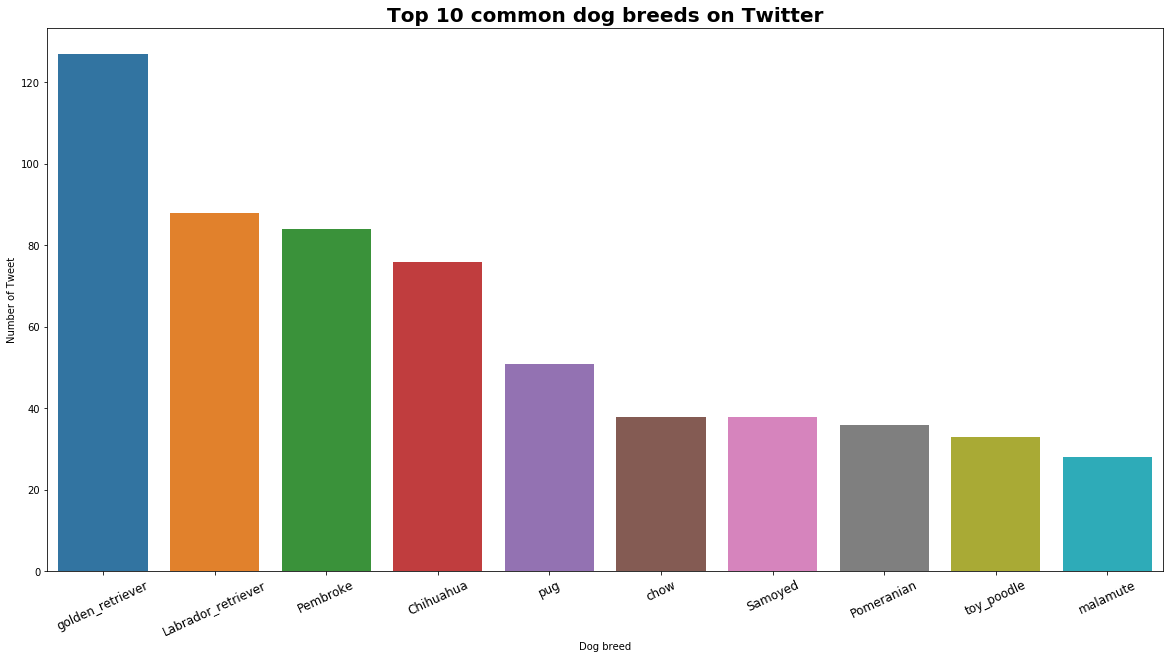

In [64]:
def bar_chart_count(master_df):
    master_df_p1 = master_df['p1'].value_counts()
    fig, ax = plt.subplots(figsize = (20,10))
    ax = sns.barplot(x = master_df_p1.head(10).index, y = master_df_p1.head(10), data = master_df)
    plt.title('Top 10 common dog breeds on Twitter', size = 20, fontweight = 'bold')
    plt.xlabel('Dog breed', size = 10)
    plt.ylabel('Number of Tweet', size = 10)
    plt.xticks(fontsize = 12, rotation = 25)
    plt.show()
    
bar_chart_count(master_df)

Golden retriever, Labrador retriever, Pembroke and Chihuahua are the most popular dog breeds on Twitter, in which, the Golden retriever's popular is dramatically higher than the second one is Labrador_retriever.

### 2. Which are the dog breeds having the most retweet count, favorite count?

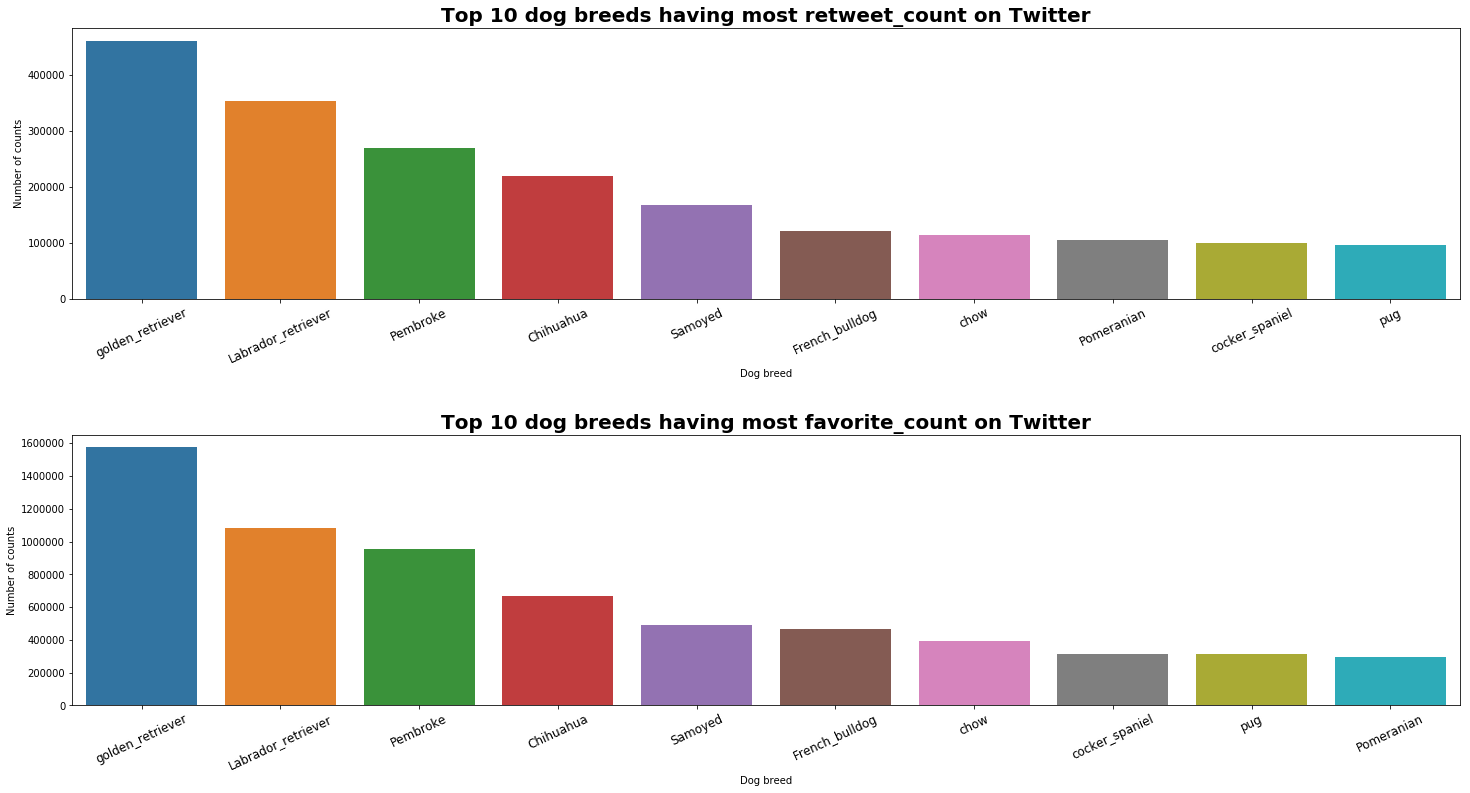

In [65]:
fig, axs = plt.subplots(figsize = (20,10)) 
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

def count_chart(master_df, col,position):
    col_count = master_df.groupby('p1')[col].sum()
    col_count.sort_values(ascending = False, inplace = True)
    
    plt.subplot(2,1,position)
    ax = sns.barplot(x = col_count.head(10).index, y = col_count.head(10), data = master_df)
    plt.title('Top 10 dog breeds having most {} on Twitter'.format(col), size = 20, fontweight = 'bold')
    plt.xlabel('Dog breed', size = 10)
    plt.ylabel('Number of counts', size = 10)
    plt.xticks(fontsize = 12, rotation = 25)
    
    
count_chart(master_df, 'retweet_count',1)
count_chart(master_df, 'favorite_count',2)

- As could be seen, Golden retreiver, Labrador retreiver, Pembroke and Chihuahua are still the 4 dog breeds having the most total retweet counts and favorite counts, and as the same as the most common dog breed chart, the Golden retriever is the outstanding among the four.
- However, the position of other dog breeds out of top 4 is different with the common dog breed list as presented in the chart 1, in detailed:
    + Samoyed is at the seventh position in popular list, but it stands at the fifth position to have to most retweet and favorite counts
    + French bulldog is not even in the list of popular dog breeds on WeRateDog but in a very high position in the retweet and favorite count list
    + Chow, pommeranian and pug have quite reasonable position comparing to the popular list above.

### 3. The correlation between favorite_count and retweet_count

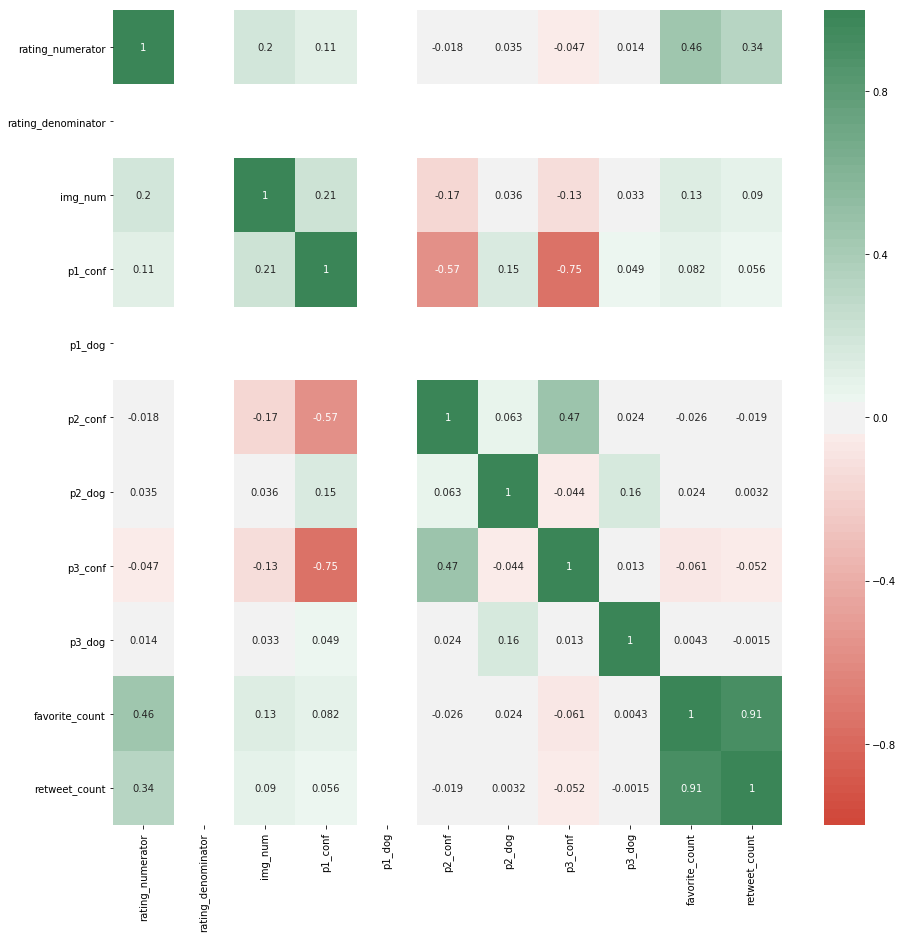

In [83]:
# Draw the heatmap to show the correlation between indexes within master_df
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(master_df.corr(), cmap=sns.diverging_palette(15, 500, n=100), \
            vmin = -1, vmax =1,annot=True)

As illustrated above, the correlation coefficient between favorite count and retweet count is +0.91, which conclude that these two index have a strong positive relationship with each other

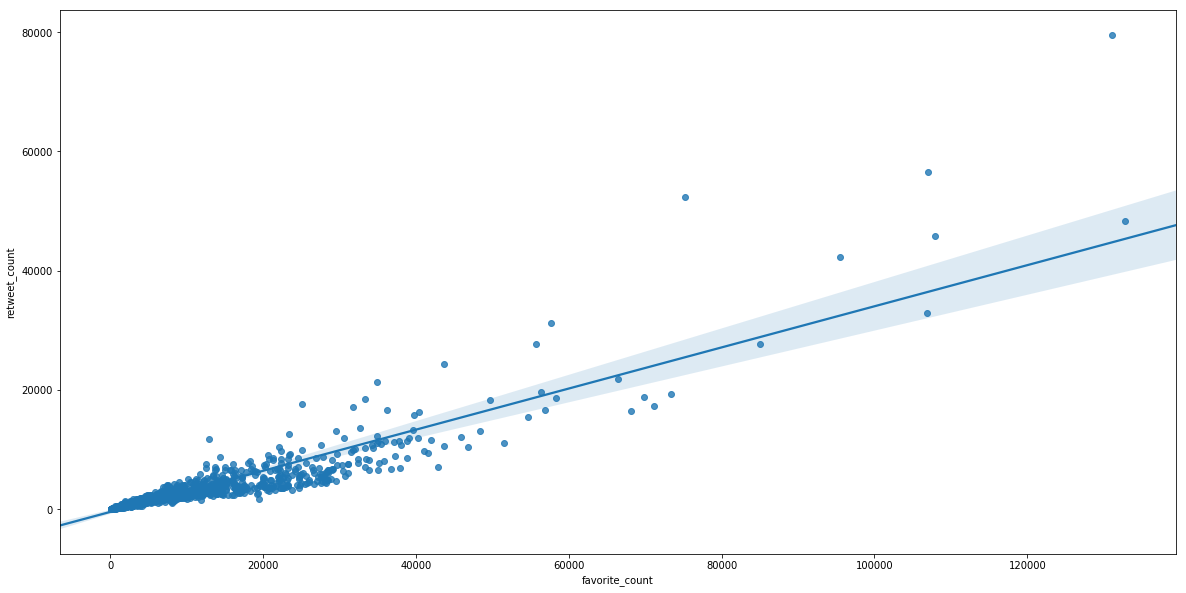

In [88]:
# illustrate the relationship between favorite count and retweet count
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.regplot(data = master_df, x = master_df['favorite_count'], y = master_df['retweet_count'])

The scatterplot shows the same result as the correlation index aforesaid. Therefore, we could conclude that most of people retweet the tweet would also do the favorite tag.

### Insights

- Golden retriever, Labrador retriever, Pembroke and Chihuahua is the most popular dog breeds in the WeRateDog on Twitter, in which the Golden retriever is the most outstanding among all.
- The 4 dog breeds above also generate the most retweet and favorite, which means these 4 dog breeds draw most of attentions from the Twitter user.
- The favorite count and retweet count have a strong positive relationship where we could conclude that most of people retweet the tweet would also do the favorite tag.